#**CUSTOMER CHURN PREDICTION**


Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

[DATASET LINK](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction)

About Dataset

It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

The dataset contains 14 columns:

Row Number: Number of records

Customer ID: A unique identifier for each customer

Surname: The customer's surname or last name

Credit Score: A numerical value representing the customer's credit score

Geography: The country where the customer resides (France, Spain or Germany)

Gender: The customer's gender (Male or Female)

Age: The customer's age.

Tenure: The number of years the customer has been with the bank

Balance: The customer's account balance

NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

EstimatedSalary: The estimated salary of the customer

Exited: Whether the customer has churned (1 = yes, 0 = no)

In [1]:
# Install Kaggle API
!pip install kaggle

# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"anushkaumbre9503","key":"9e55365d25d31096d9b69a74c87c6894"}'}

In [2]:
# Move kaggle.json to the correct directory and set the permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# Download the dataset
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 30.0MB/s]


In [4]:
!unzip bank-customer-churn-prediction.zip

Archive:  bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [5]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Display basic information and the first few rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [7]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Data Preprocessing and EDA

In [8]:
# Dropping RowNumber,CustomerID,Surname
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace = True)

In [9]:
# Checking for null values
null_values = df.isnull().sum().sum()
print(f"Number of Null values : {null_values}")

Number of Null values : 0


In [10]:
list(df.columns)

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [11]:
df["Tenure"].value_counts().values

array([1048, 1035, 1028, 1025, 1012, 1009,  989,  984,  967,  490,  413])

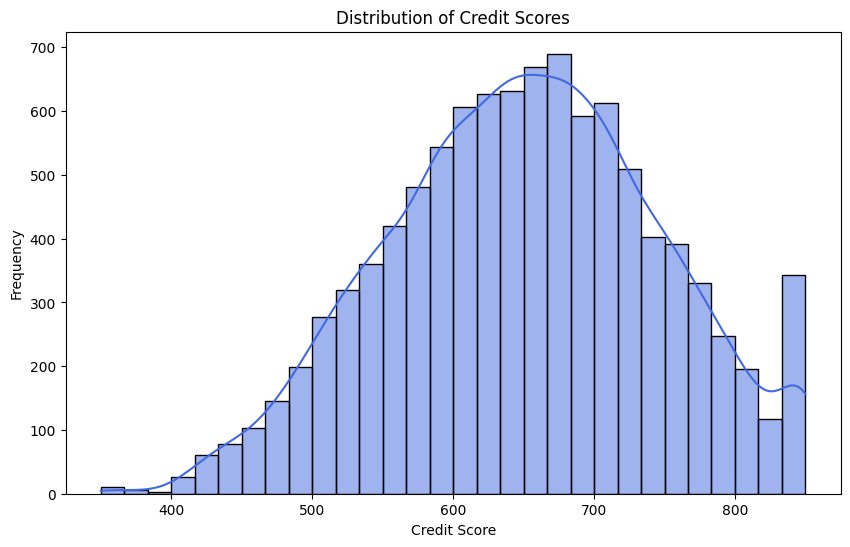

In [13]:
# Disribution of Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-5b82e17b8eea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Geography', palette='Set2')


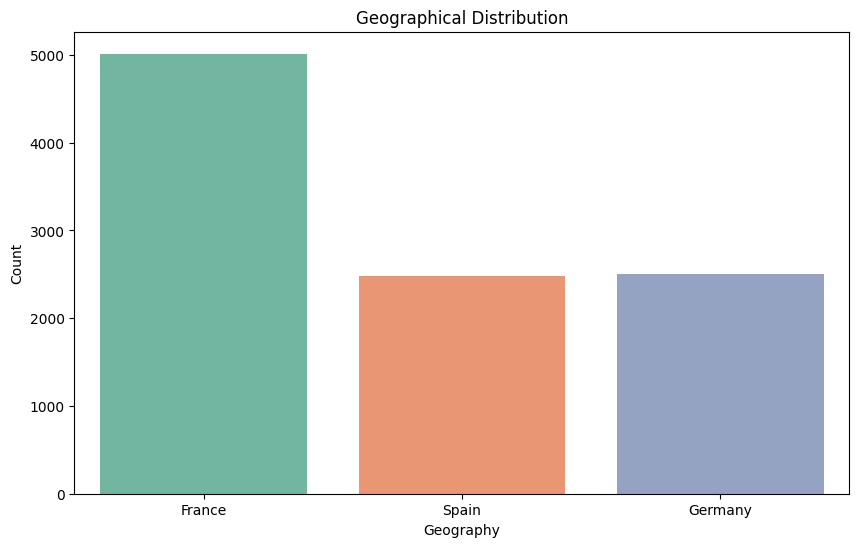

In [15]:
# Geographical Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Geography', palette='Set2')
plt.title('Geographical Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

<ipython-input-17-c37eaee89abb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='coolwarm')


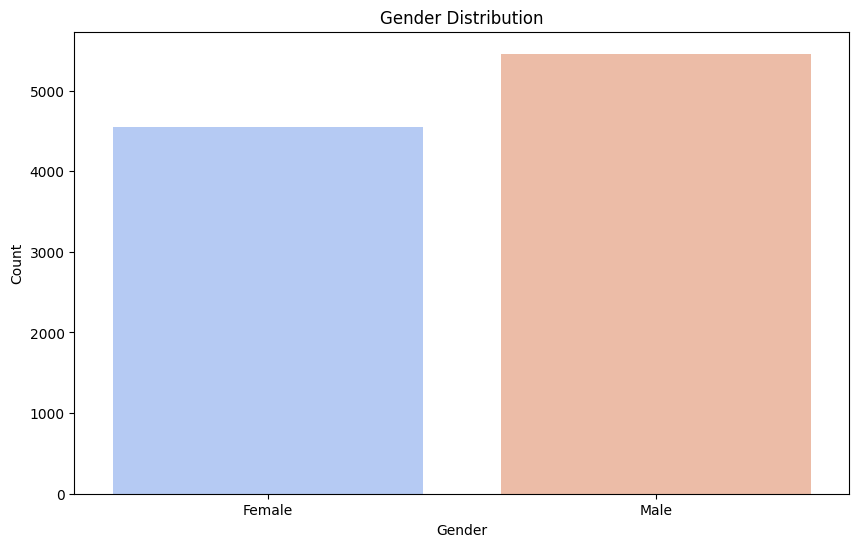

In [17]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

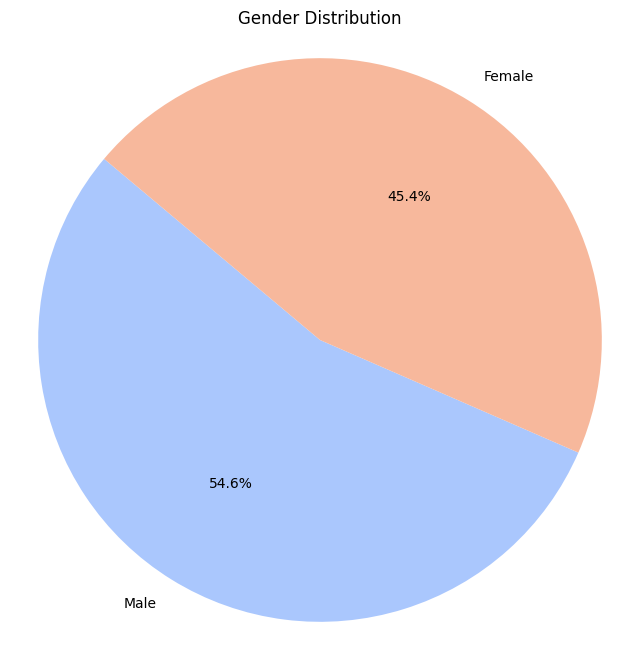

In [18]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

colors = sns.color_palette('coolwarm', len(labels))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

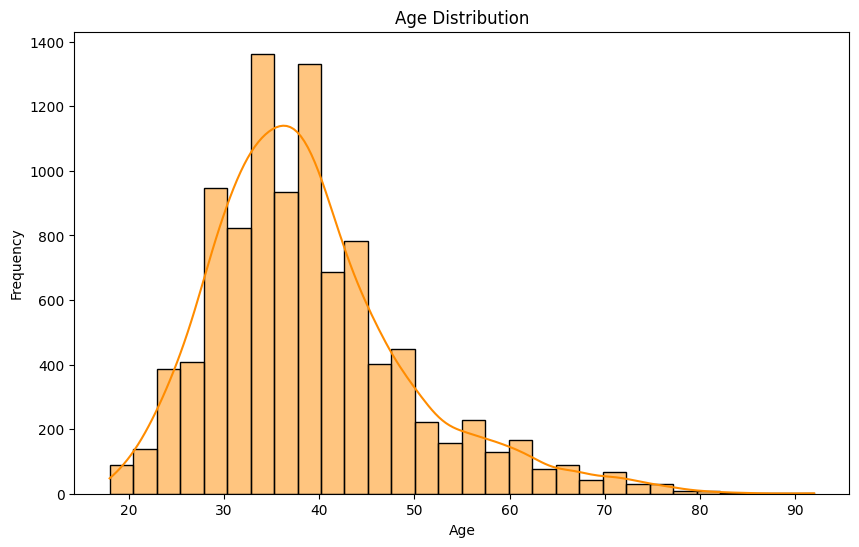

In [19]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data = df,x="Age",kde = True,bins = 30,color = "darkorange")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

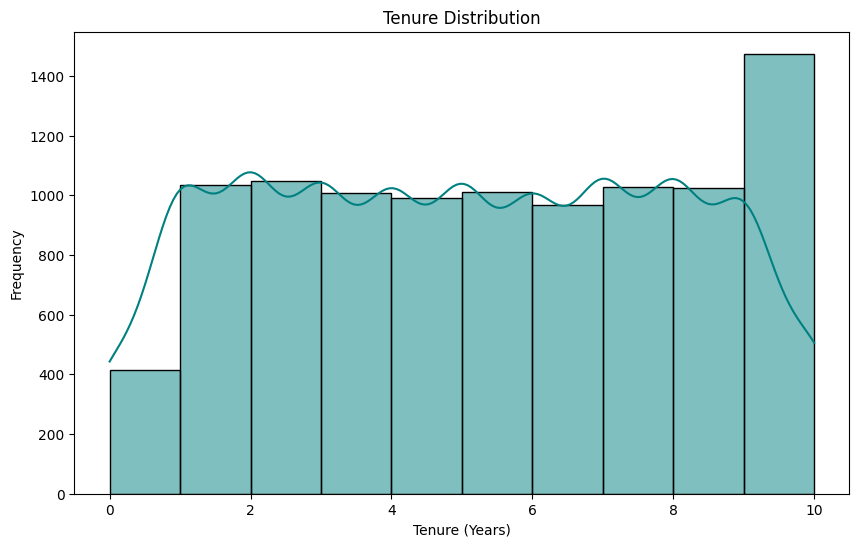

In [21]:
# Tenure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], bins=10, kde=True, color='teal')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-23-3c27e37d71a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Tenure",palette = "viridis")


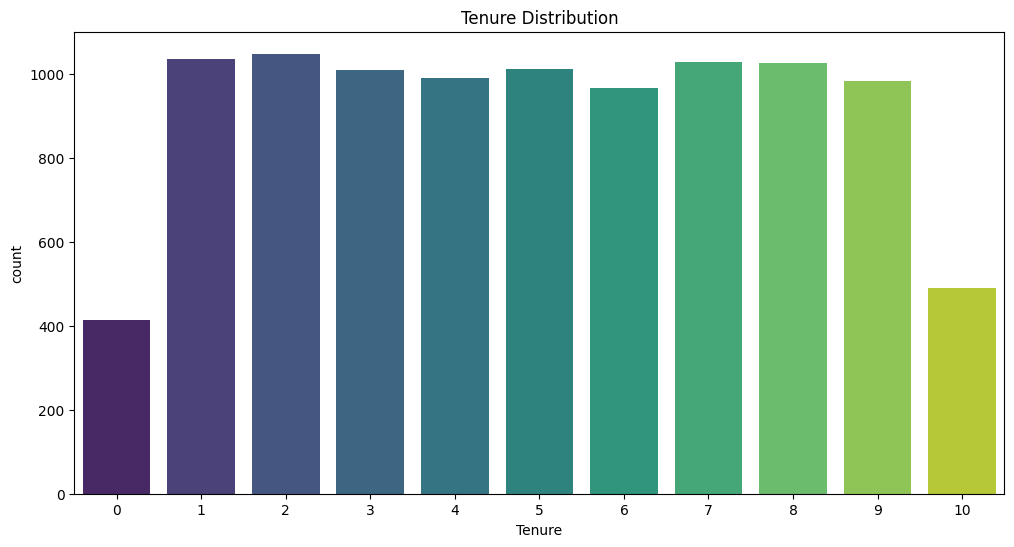

In [23]:
tenure = df["Tenure"].value_counts()
plt.figure(figsize = (12,6))
sns.countplot(data=df,x="Tenure",palette = "viridis")
plt.title("Tenure Distribution")
plt.show()

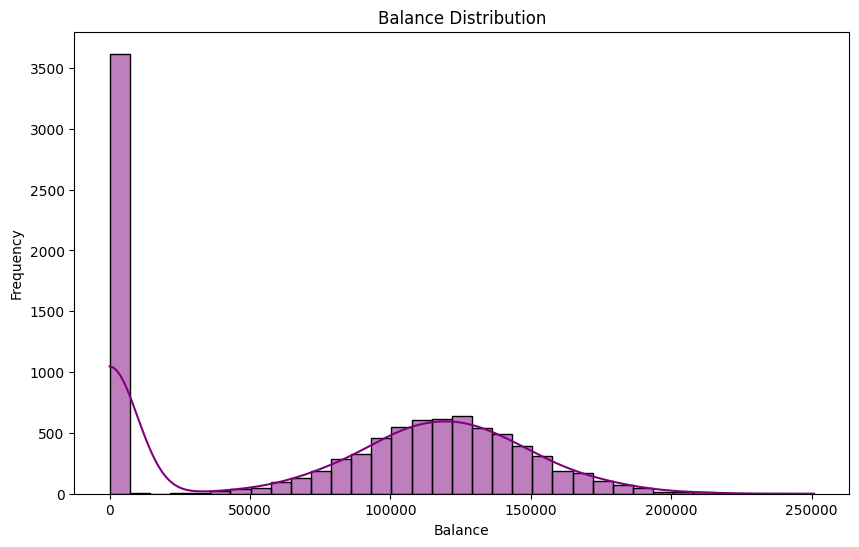

In [25]:
# Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], bins=35, kde=True, color='purple')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

<ipython-input-27-1d76b97f8c21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NumOfProducts', palette='Set1')


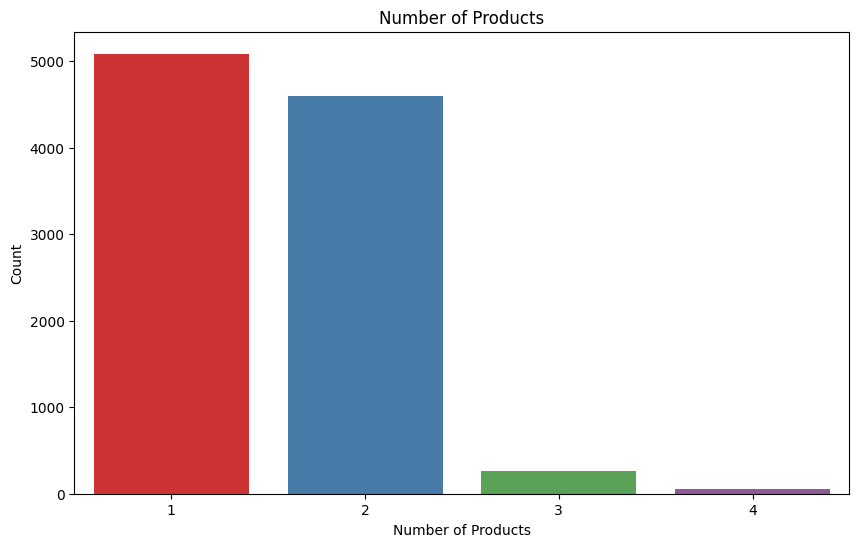

In [27]:
#Number of Products
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumOfProducts', palette='Set1')
plt.title('Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

<ipython-input-28-7ff7f98e0ff6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HasCrCard', palette='Set2')


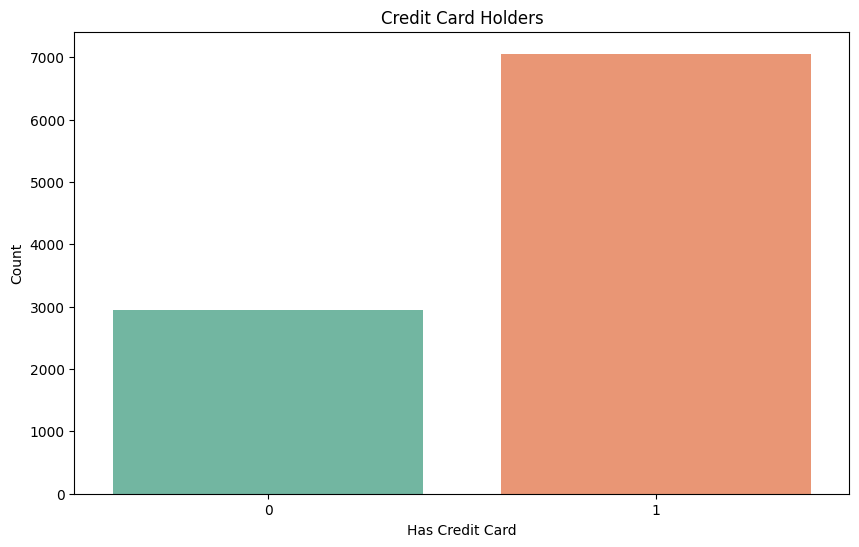

In [28]:
#Credit Card Holders
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HasCrCard', palette='Set2')
plt.title('Credit Card Holders')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

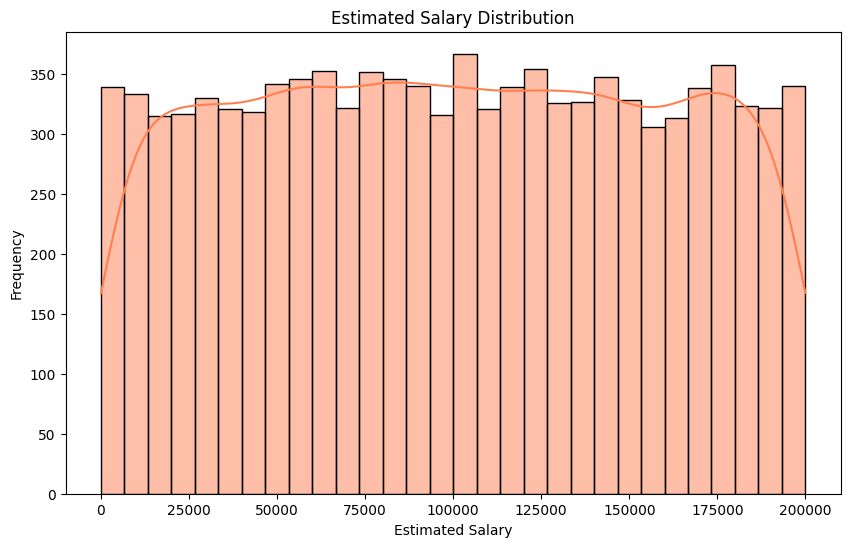

In [30]:
# Estimated Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='coral')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

<ipython-input-31-4d4c272700d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited', palette='Set3')


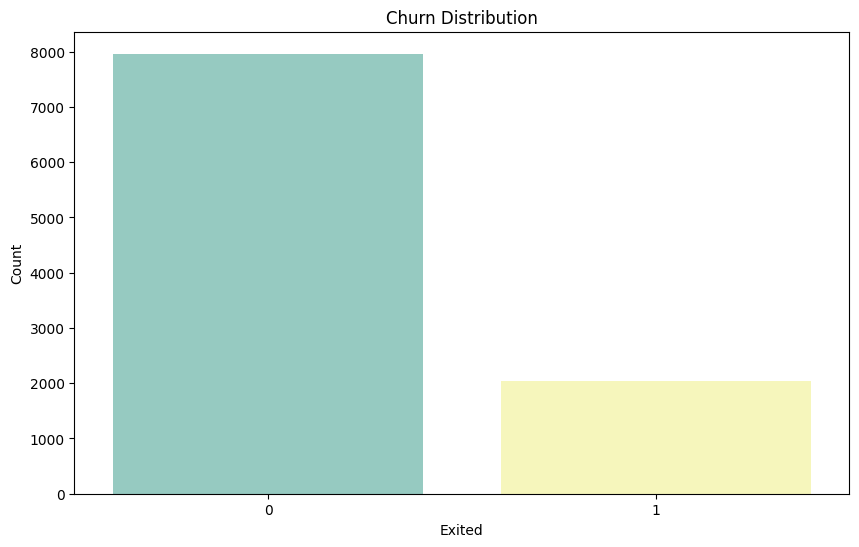

In [31]:
# Churn Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Exited', palette='Set3')
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

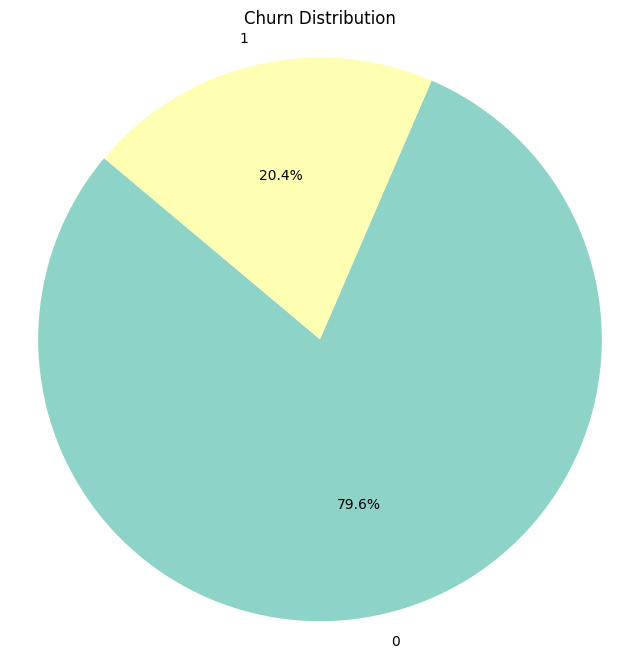

In [32]:
churn_counts = df['Exited'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

colors = sns.color_palette('Set3', len(labels))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

In [33]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [34]:
# Split the data into features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [35]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training and Evaluation

1. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred)*100)
print(classification_report(y_test, lr_y_pred))

Logistic Regression Accuracy: 81.5
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



2. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred)*100)
print(classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 86.4
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



3. Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_y_pred)*100)
print(classification_report(y_test, gb_y_pred))


Gradient Boosting Accuracy: 86.55000000000001
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Confusion Matrix

A confusion matrix provides a summary of prediction results on a classification problem. The number of correct and incorrect predictions is summarized with count values and broken down by each class.

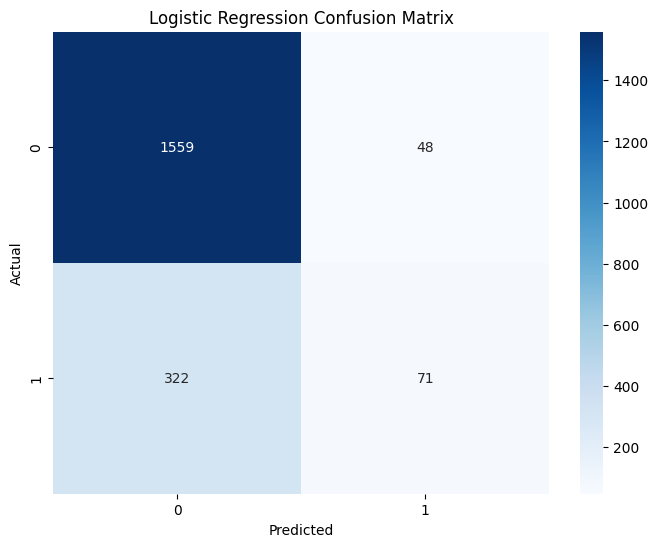

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, lr_y_pred, "Logistic Regression Confusion Matrix")


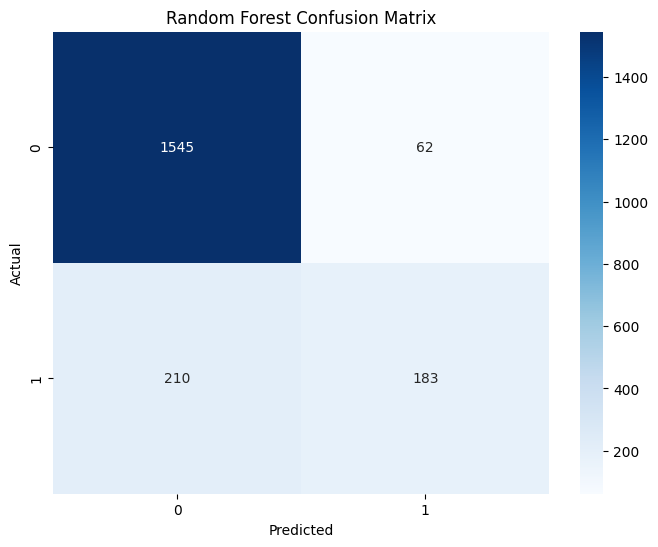

In [49]:
plot_confusion_matrix(y_test, rf_y_pred, "Random Forest Confusion Matrix")


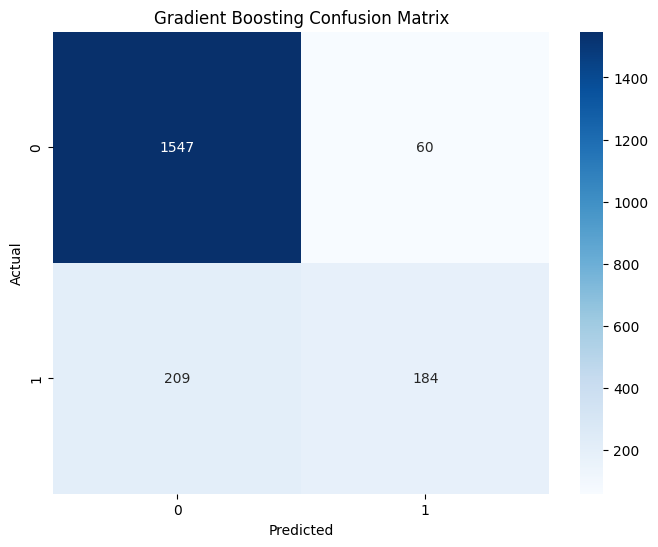

In [50]:
plot_confusion_matrix(y_test, gb_y_pred, "Gradient Boosting Confusion Matrix")

ROC Curve and AUC

The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The Area Under the Curve (AUC) represents the degree or measure of separability.

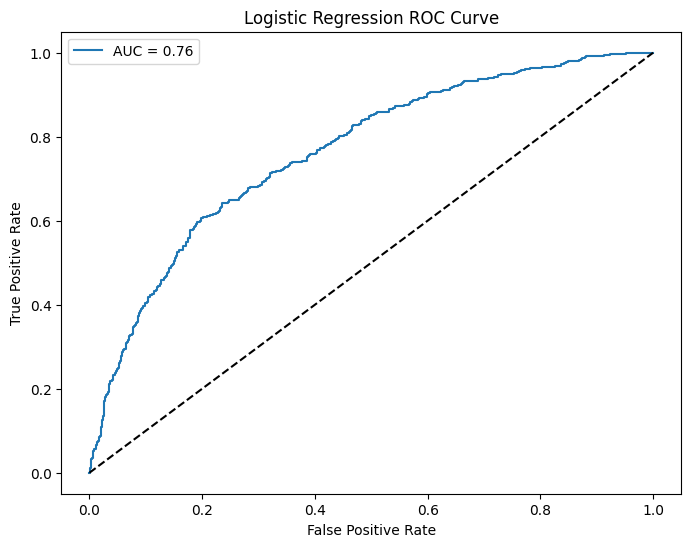

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Predict probabilities
lr_y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
gb_y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Plot ROC curves
plot_roc_curve(y_test, lr_y_pred_proba, "Logistic Regression ROC Curve")

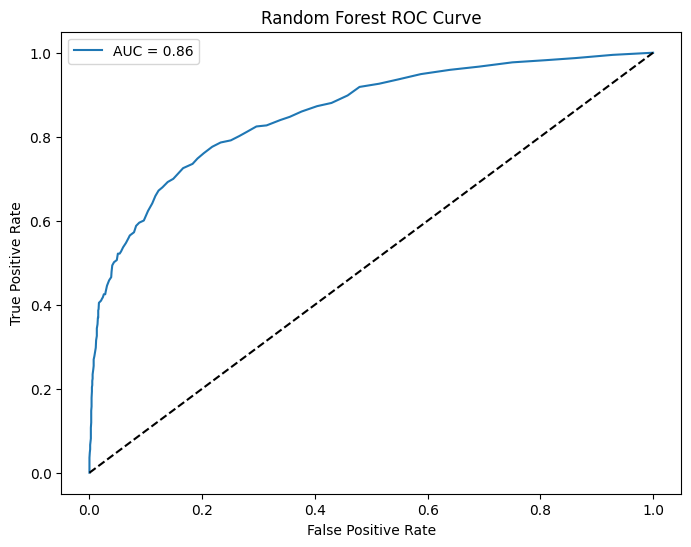

In [53]:
plot_roc_curve(y_test, rf_y_pred_proba, "Random Forest ROC Curve")

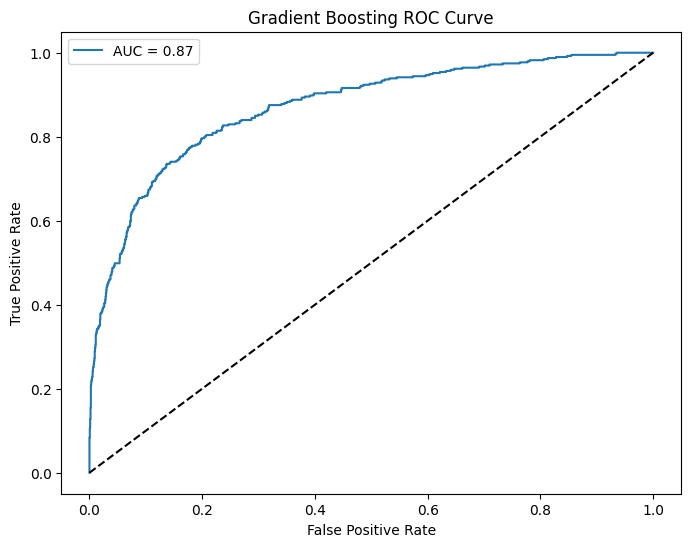

In [54]:
plot_roc_curve(y_test, gb_y_pred_proba, "Gradient Boosting ROC Curve")

Precision-Recall Curve

Precision-Recall curves are useful for imbalanced datasets. They show the trade-off between precision and recall for different threshold values.

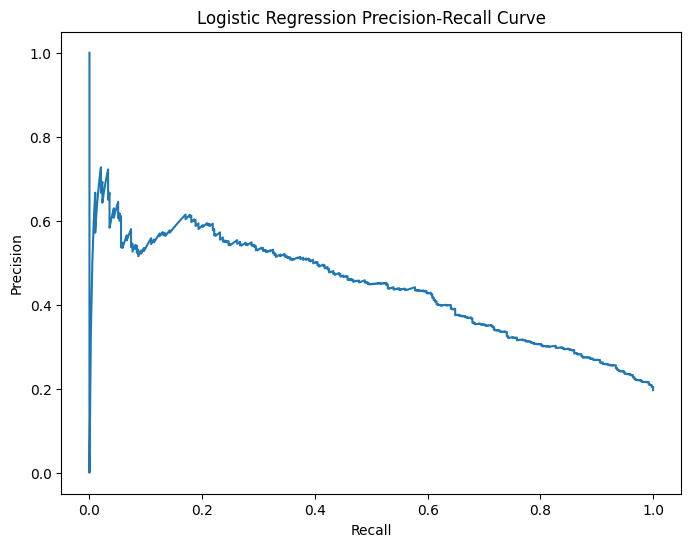

In [55]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_pred_proba, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()

# Plot Precision-Recall curves
plot_precision_recall_curve(y_test, lr_y_pred_proba, "Logistic Regression Precision-Recall Curve")

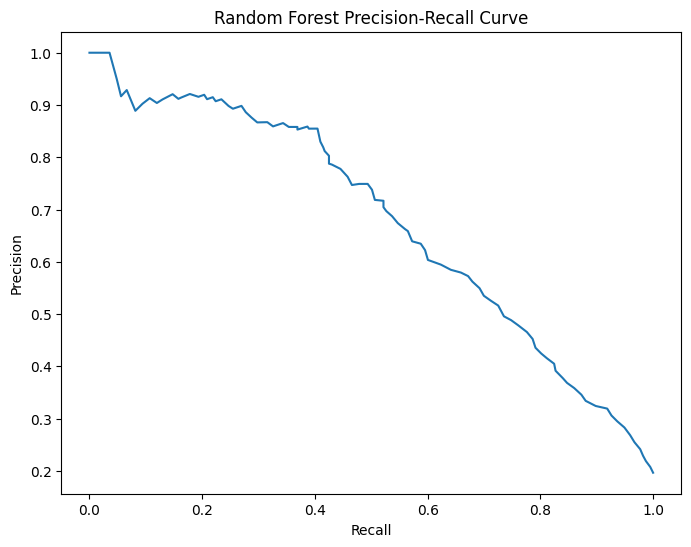

In [56]:
plot_precision_recall_curve(y_test, rf_y_pred_proba, "Random Forest Precision-Recall Curve")

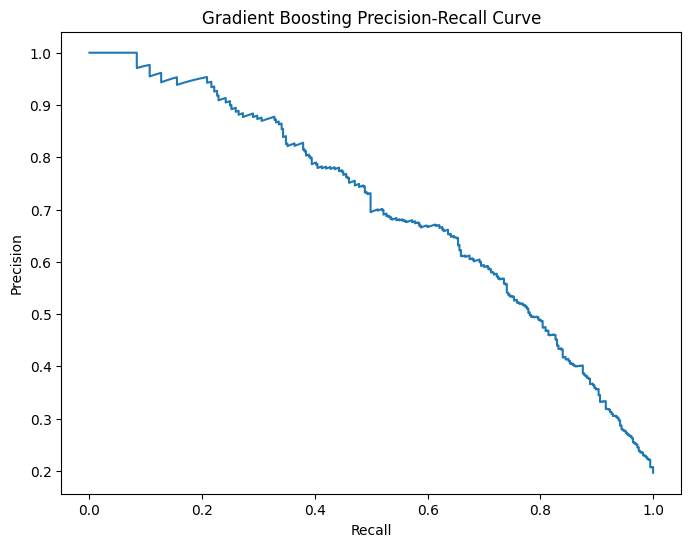

In [57]:
plot_precision_recall_curve(y_test, gb_y_pred_proba, "Gradient Boosting Precision-Recall Curve")

Classification Report

A classification report provides a more detailed breakdown of each class’s precision, recall, and F1-score.

In [58]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_y_pred))

print("Random Forest Classification Report")
print(classification_report(y_test, rf_y_pred))

print("Gradient Boosting Classification Report")
print(classification_report(y_test, gb_y_pred))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro a

Feature Importance (for Tree-Based Models)

For tree-based models like Random Forest and Gradient Boosting, you can visualize the feature importance to understand which features are contributing the most to the prediction.

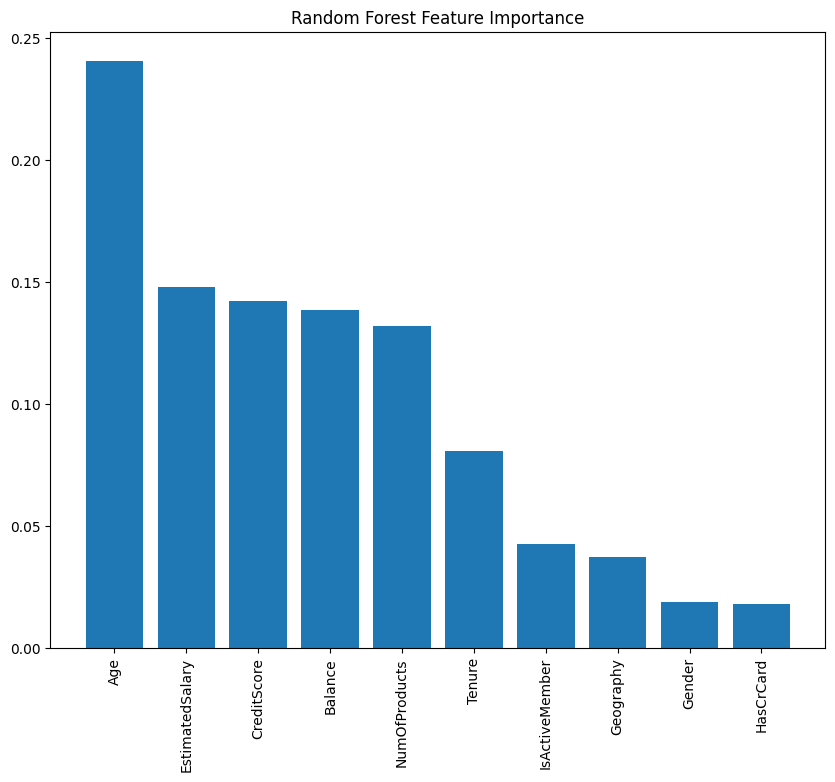

In [59]:
def plot_feature_importance(model, features, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.bar(range(len(importance)), importance[indices], align='center')
    plt.xticks(range(len(importance)), [features[i] for i in indices], rotation=90)
    plt.show()

features = df.drop('Exited', axis=1).columns

plot_feature_importance(rf_model, features, "Random Forest Feature Importance")

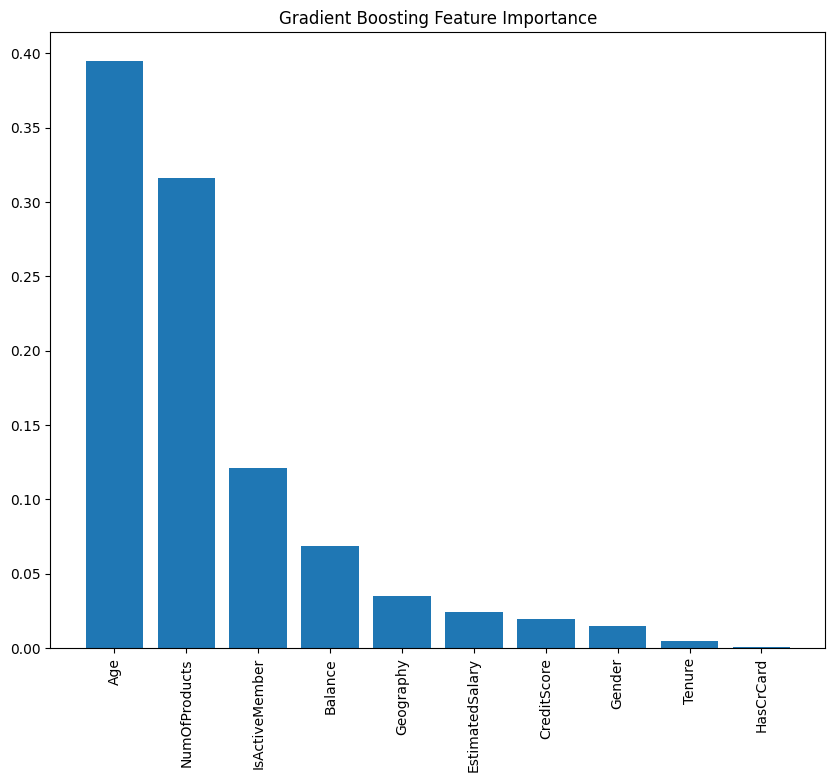

In [60]:
plot_feature_importance(gb_model, features, "Gradient Boosting Feature Importance")

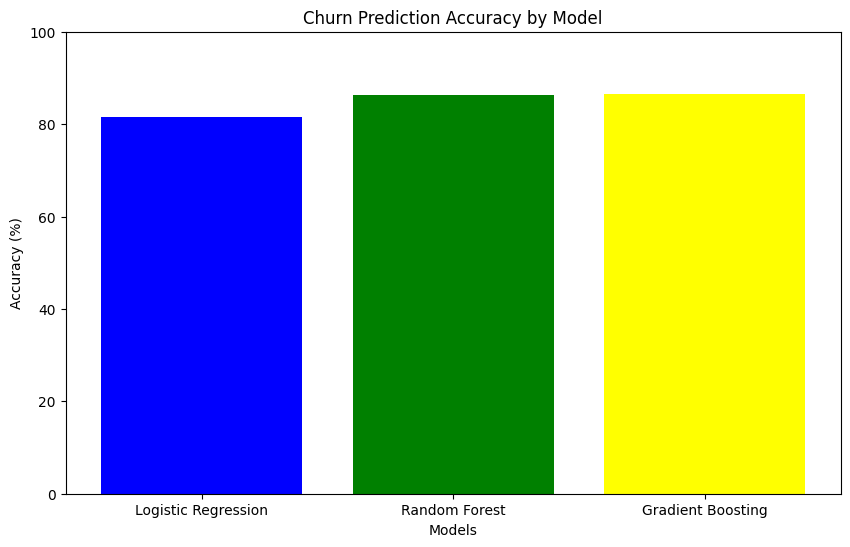

In [62]:
# Plotting
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [accuracy_score(y_test, lr_y_pred) * 100, accuracy_score(y_test, rf_y_pred) * 100, accuracy_score(y_test, gb_y_pred) * 100]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'green', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Churn Prediction Accuracy by Model')
plt.ylim(0, 100)
plt.show()

**Summary**

The objective of this project was to develop a predictive model to identify customers who are likely to churn from our subscription-based service. Using historical customer data, we trained and evaluated multiple machine learning models, including Logistic Regression, Random Forest, and Gradient Boosting.

Our analysis shows that the Gradient Boosting model performed the best with an accuracy of 86.5%. This model will help us proactively identify customers at risk of churn and take appropriate actions to retain them.
